(5000, 7)
   order_id  shop_id  user_id  order_amount  total_items payment_method  \
0         1       53      746           224            2           cash   
1         2       92      925            90            1           cash   
2         3       44      861           144            1           cash   
3         4       18      935           156            1    credit_card   
4         5       18      883           156            1    credit_card   
5         6       58      882           138            1    credit_card   
6         7       87      915           149            1           cash   
7         8       22      761           292            2           cash   
8         9       64      914           266            2          debit   
9        10       52      788           146            1    credit_card   

            created_at  
0  2017-03-13 12:36:56  
1  2017-03-03 17:38:52  
2   2017-03-14 4:23:56  
3  2017-03-26 12:43:37  
4   2017-03-01 4:35:11  
5  2017-03-14 

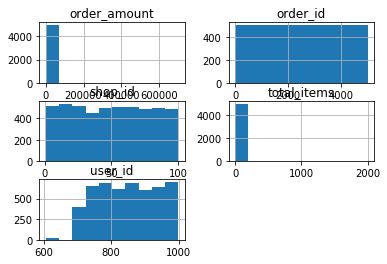

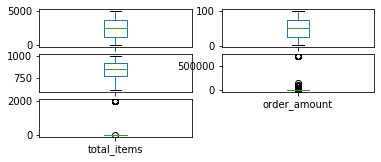

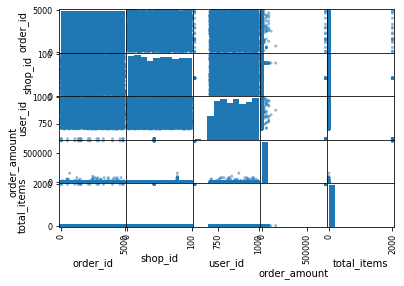

3145.128
357.92152221412965
307.01149425287355
150.4


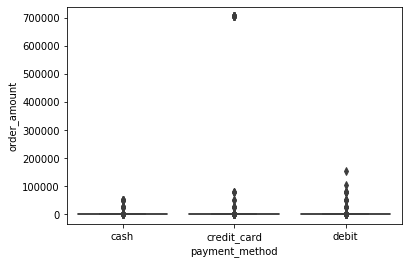

In [92]:
# import libraries
import pandas as pd
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt


#import data    
data = pd.read_csv("C:/Users/Thomas S/Documents/6. Applications/Data.csv")

#data overview
print(data.shape)
print(data.head(10))

#simple historgram
data.hist()

#simple boxplot
data.plot(kind='box', subplots=True, layout=(5,2), sharex=False, sharey=False)
pyplot.show()

# scatter matrix
scatter_matrix(data)
pyplot.show()

#simple boxplot
plot1 = plt.figure(1)
sns.boxplot(x = 'payment_method', y = 'order_amount', data = data)


#a)
#What whent wrong:
print(data['order_amount'].sum()/data['total_items'].count())
# simply deviding by the number of orders is not very insightfull
# it disregards that some customers seemingly ordered as many as 2000 items in a single order
# and that some customers seemingly ordered shoes for over $ 25000

#b)
# A better metric would be to calcualte the average price per unit
# This price can be computed by deviding the sum of all revenues by the number of units ordered
print(data['order_amount'].sum()/data['total_items'].sum())

#c) 
#the value is 357.92 with no filters of outliers 
#however this is seems very high therefore removing outliers could make sense
#since the most expensive shoe in the data is listed at being ordered for $25725 this value elevates the average beyond realistic shoe prices
#moreover there are multiple purchases of 2000 shoes per order which also seems strange especially since the price per shoe on those orders is $352
#the value is 307.01 filtering out all shoes purchased for more than $ 25000
#the value is 150.4 filtering out all shoes purchased for more more than $ 351

#creating new column for price per shoe
data['price_per_shoe'] = data['order_amount']/data['total_items']

#average price per unit filtering out all prices above 25000
# the value is 307.01
datanew = data[data['price_per_shoe'] <= 25000]
print(datanew['order_amount'].sum()/datanew['total_items'].sum())

#average price per unit filtering out all prices above 351
#the value is 150.4 
datanew2 = datanew[datanew['price_per_shoe']<=351]
print(datanew2['order_amount'].sum()/datanew2['total_items'].sum())